In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [25]:
glass_df = pd.read_csv('glass.csv')

In [16]:
#Cleaning data
glass_df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [54]:
y = glass_df['Type of glass']
X = glass_df.drop(columns=['Type of glass', 'Id'])

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
#Exploratory Data Analysis
X.head(n=5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


In [57]:
#Correlation matrix
print(X.corr(method='pearson'))

          RI        Na        Mg        Al        Si         K        Ca  \
RI  1.000000 -0.191885 -0.122274 -0.407326 -0.542052 -0.289833  0.810403   
Na -0.191885  1.000000 -0.273732  0.156794 -0.069809 -0.266087 -0.275442   
Mg -0.122274 -0.273732  1.000000 -0.481799 -0.165927  0.005396 -0.443750   
Al -0.407326  0.156794 -0.481799  1.000000 -0.005524  0.325958 -0.259592   
Si -0.542052 -0.069809 -0.165927 -0.005524  1.000000 -0.193331 -0.208732   
K  -0.289833 -0.266087  0.005396  0.325958 -0.193331  1.000000 -0.317836   
Ca  0.810403 -0.275442 -0.443750 -0.259592 -0.208732 -0.317836  1.000000   
Ba -0.000386  0.326603 -0.492262  0.479404 -0.102151 -0.042618 -0.112841   
Fe  0.143010 -0.241346  0.083060 -0.074402 -0.094201 -0.007719  0.124968   

          Ba        Fe  
RI -0.000386  0.143010  
Na  0.326603 -0.241346  
Mg -0.492262  0.083060  
Al  0.479404 -0.074402  
Si -0.102151 -0.094201  
K  -0.042618 -0.007719  
Ca -0.112841  0.124968  
Ba  1.000000 -0.058692  
Fe -0.058692  

Text(0.5, 1.0, 'Feature Correlation')

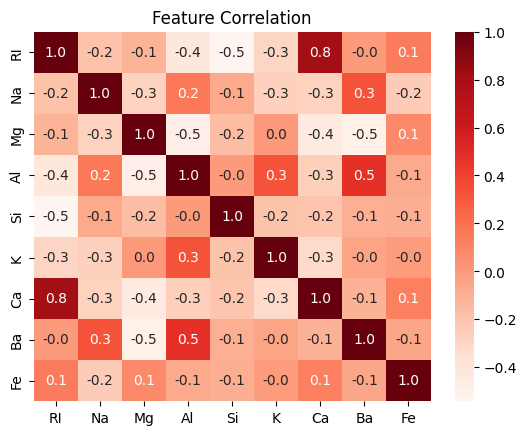

In [59]:
#Plotting the correlation heatmap 
corr_heatmap = sns.heatmap(X.corr(), cmap='Reds', annot=True, fmt=".1f")
corr_heatmap.set_title('Feature Correlation')

In [91]:
#Feature selection
feature_selector = SFS(
    LogisticRegression(),
    scoring='accuracy',
    cv=3)
pipeline = Pipeline([("scaler", StandardScaler()),
                    ("feature_selection", feature_selector),
                    ("lr", LogisticRegression())])

In [92]:
#fit the pipeline on the training set
pipeline.fit(x_train, y_train)
pipeline_test_score = pipeline.score(x_test, y_test)
pipeline_train_score = pipeline.score(x_train, y_train)
y_pred = pipeline.predict(x_test)
f1 = f1_score(y_test, y_pred, average='micro')
print(f"Pipeline Test Accuracy (with lr): {pipeline_test_score}")
print(f"Pipeline Training Accuracy (with lr): {pipeline_train_score}")
print(f"Pipeline F1 Score: {f1}")

Pipeline Test Accuracy (with lr): 0.9069767441860465
Pipeline Training Accuracy (with lr): 0.8830409356725146
Pipeline F1 Score: 0.9069767441860465


In [93]:
#Hyperparameter tuning
tuning_params = [{'lr': [LogisticRegression()], 'lr__fit_intercept': [True, False]},
                {'lr': [RandomForestClassifier()], 'lr__n_estimators': [120, 150, 200, 210]}]
gs = GridSearchCV(pipeline, tuning_params, scoring='neg_root_mean_squared_error', cv=3)

In [110]:
#Checking for best models
gs.fit(x_train, y_train)
best_pipeline_model = gs.best_estimator_
best_model = best_pipeline_model.named_steps['lr']
best_regression_params = best_pipeline_model.named_steps['lr'].get_params()
print(f"The Best Regression Model: {best_model}")
print(f"The Hyperparameters of the Best Model Are: {best_regression_params}")

The Best Regression Model: RandomForestClassifier(n_estimators=210)
The Hyperparameters of the Best Model Are: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 210, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Pipeline Accuracy Score: 1.0


In [111]:
#Model validation
model_score = best_pipeline_model.score(x_test, y_test)
print(f"Pipeline Accuracy Score: {model_score}")

Pipeline Accuracy Score: 1.0


In [114]:
#Classes for classification


[1 7 1 7 2 2 1 2 2 2 6 5 2 2 6 5 7 1 1 6 2 7 7 7 3 2 1 1 5 1 1 2 3 2 1 7 5
 3 2 2 2 7 1]
